In [1]:


import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
import h5py
from mintpy.utils import readfile, utils as ut 
from scipy import stats
import matplotlib.dates as mdates
from mintpy.objects import timeseries
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mintpy.utils import plot as pp
import matplotlib.ticker as mticker



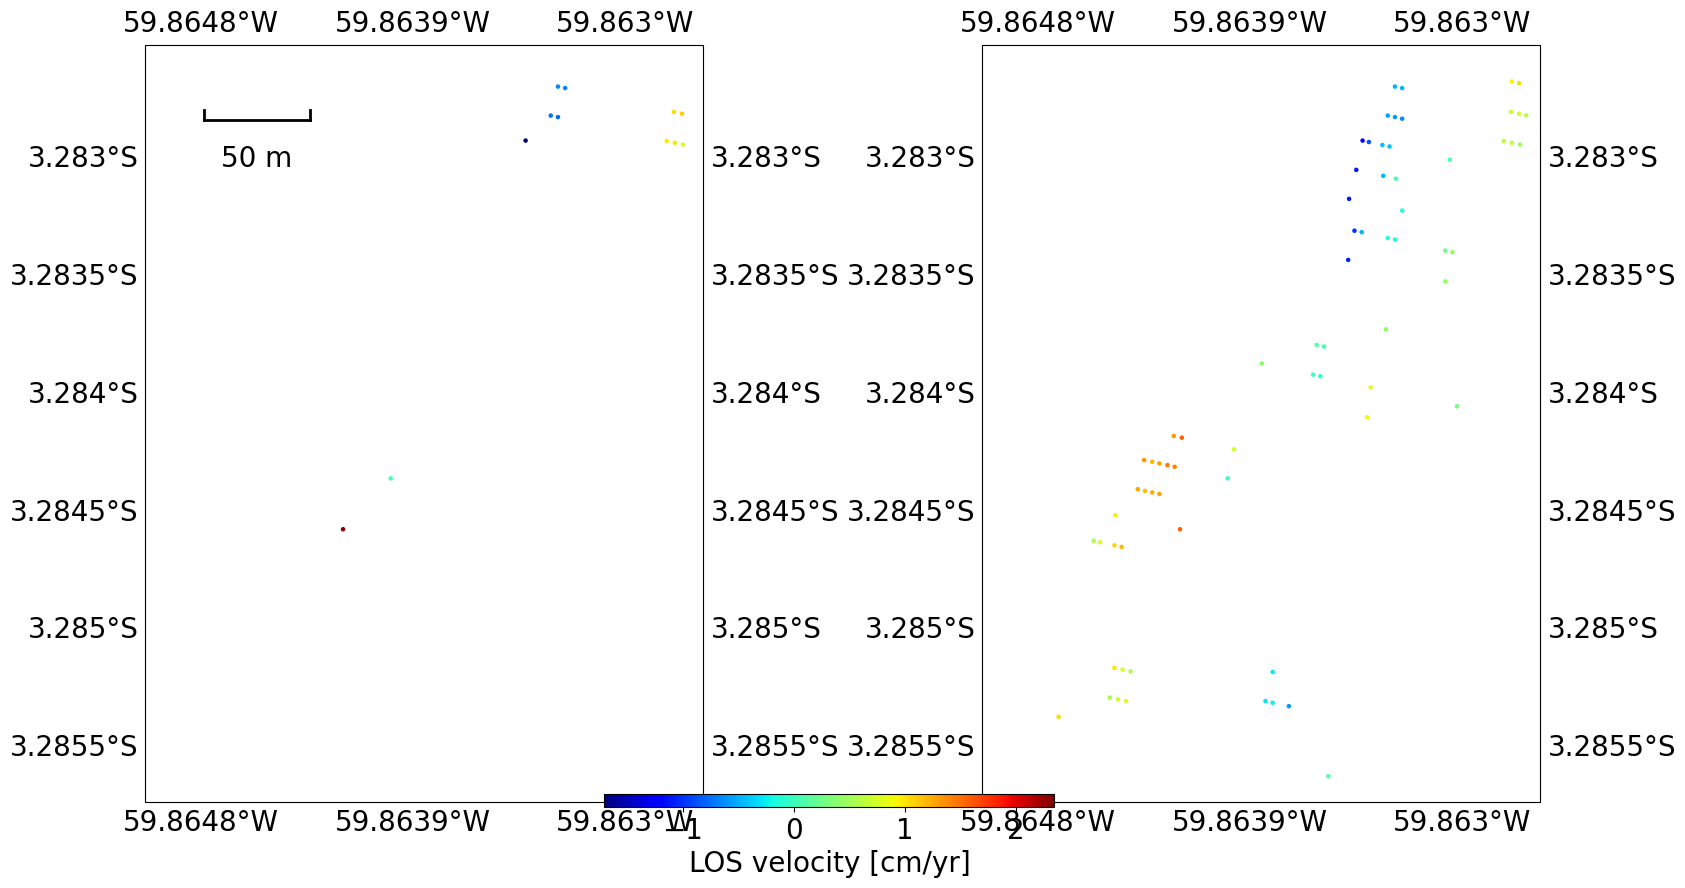

In [3]:

project_dir = '/insar-data/AutazMirim/miaplpy'
#project_dir = '/Volumes/SaraMNew/scratch/minopy_subsets/MudCreekLandslideSenDT42'
out_dir = './out_figures'
#os.chdir(project_dir)

#out_amplitude = project_dir + '/mean_amplitude'

reflat = 35.9022
reflon = -121.4523



plt.rcParams["font.size"] = "20"


factor = [1.5]

geom_mud2 = project_dir + '/inputs/geometryRadar.h5'
data_mud2 = project_dir + '/network_delaunay_4/velocity.h5'
mask_tem_file = project_dir + '/network_delaunay_4/maskTempCoh.h5'
mask_ps_file = project_dir + '/maskPS.h5'
#watermask_file = project_dir + '/network_mini_stacks/waterMask.h5'
tcoh_file = project_dir + '/network_delaunay_4/temporalCoherence.h5'

latitude = readfile.read(geom_mud2, datasetName='latitude')[0]
longitude = readfile.read(geom_mud2, datasetName='longitude')[0]
velocity = readfile.read(data_mud2, datasetName='velocity')[0]*100
#mask_w = readfile.read(watermask_file, datasetName='mask')[0]
tempCoh = readfile.read(tcoh_file, datasetName='temporalCoherence')[0] #*mask_w
#mask_t = mask_w
#mask_t[tempCoh<0.6] = 0

mask_t = readfile.read(mask_tem_file, datasetName='mask')[0] #*mask_w
mask_p = readfile.read(mask_ps_file, datasetName='mask')[0] #*mask_w


fig, axs = plt.subplots(nrows=1, ncols=2, 
                        figsize=(18,13), subplot_kw=dict(projection=ccrs.PlateCarree()))


mask = mask_t
## Plot Pichincha

#box = ['-6.59:-6.54','-47.49:-47.41']
#box = ['-6.564375304965627:-6.555642359576077','-47.46765349249481:-47.45270169673063']
box = ['-3.285728172223284:-3.282516054019862','-59.86503513622157:-59.86266781146101']

lat = [float(i) for i in box[0].split(':')]
lon = [float(i) for i in box[1].split(':')]

ax = axs[1]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())

im=ax.scatter(longitude[mask==1], latitude[mask==1], 
           c=velocity[mask==1], s=5, cmap='jet') #, vmin=-1.2, vmax=1.2); 

ax.scatter(reflon, reflat, marker="s", color='black', s=100); 

#cbar_top = fig.colorbar(im, ax=ax, orientation='horizontal', shrink=0.28, pad=0.08) #, cax=cax_top)
#cbar_top.set_ticks([-1, 0, 1])
#cbar_top.set_label('cm/y')


gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right = True
gl.xlines = True
#gl.xlocator = mticker.FixedLocator([-80.13])
#gl.ylocator = mticker.FixedLocator([25.88, 25.89])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


ax = axs[0]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
mask = mask_p
ax.scatter(longitude[mask==1], latitude[mask==1], 
           c=velocity[mask==1], s=5, cmap='jet') #, vmin=-1.2, vmax=1.2); 

ax.scatter(reflon, reflat,marker="s", color='black', s=100); 

geo_box = (lon[0], lat[0], lon[1], lat[1])
pp.draw_scalebar(ax, geo_box, unit='degrees', loc=[0.2, 0.2, 0.1], labelpad=0.05, color='k', font_size=20)

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right = False
gl.xlines = True
#gl.xlocator = mticker.FixedLocator([-80.13])
#gl.ylocator = mticker.FixedLocator([25.88, 25.89])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


cbar_ax = fig.add_axes([0.38, 0.2, 0.25, 0.01])
fig.colorbar(im, cax=cbar_ax, label='LOS velocity [cm/yr]', orientation='horizontal')

fig.subplots_adjust(hspace=0.2, wspace=0.5)


#plt.savefig(out_dir +'/mudcreek_map_PSDS.png', bbox_inches='tight', dpi=300) 
plt.show()



In [4]:
!view.py /insar-data/Miaplpy_Tocantins/miaplpy/inputs/geometryRadar.h5 height -u m -c terrain --nodisplay --save

run view.py in MintPy version 1.6.2, date 2025-07-07
input file is geometry file: /insar-data/Miaplpy_Tocantins/miaplpy/inputs/geometryRadar.h5 in float32 format
file size in y/x: (36, 169)
input dataset: "['height']"
num of datasets in file geometryRadar.h5: 7
datasets to exclude (0):
[]
datasets to display (1):
['height']
data   coverage in y/x: (0, 0, 169, 36)
subset coverage in y/x: (0, 0, 169, 36)
data   coverage in lat/lon: None
subset coverage in lat/lon: None
------------------------------------------------------------------------
colormap: terrain
DESCENDING orbit -> flip left-right
figure title: height
figure size : [10.0, 1.7]
reading data ...
data    range: [133.99252, 150.65361] m
display range: [133.99252, 150.65361] m
display data in transparency: 1.0
plotting in Y/X coordinate ...
plotting data via matplotlib.pyplot.imshow ...
flip figure left and right
save figure to /insar-data/InSAR/height.png with dpi=300


timeseries shape: (133, 54, 29)


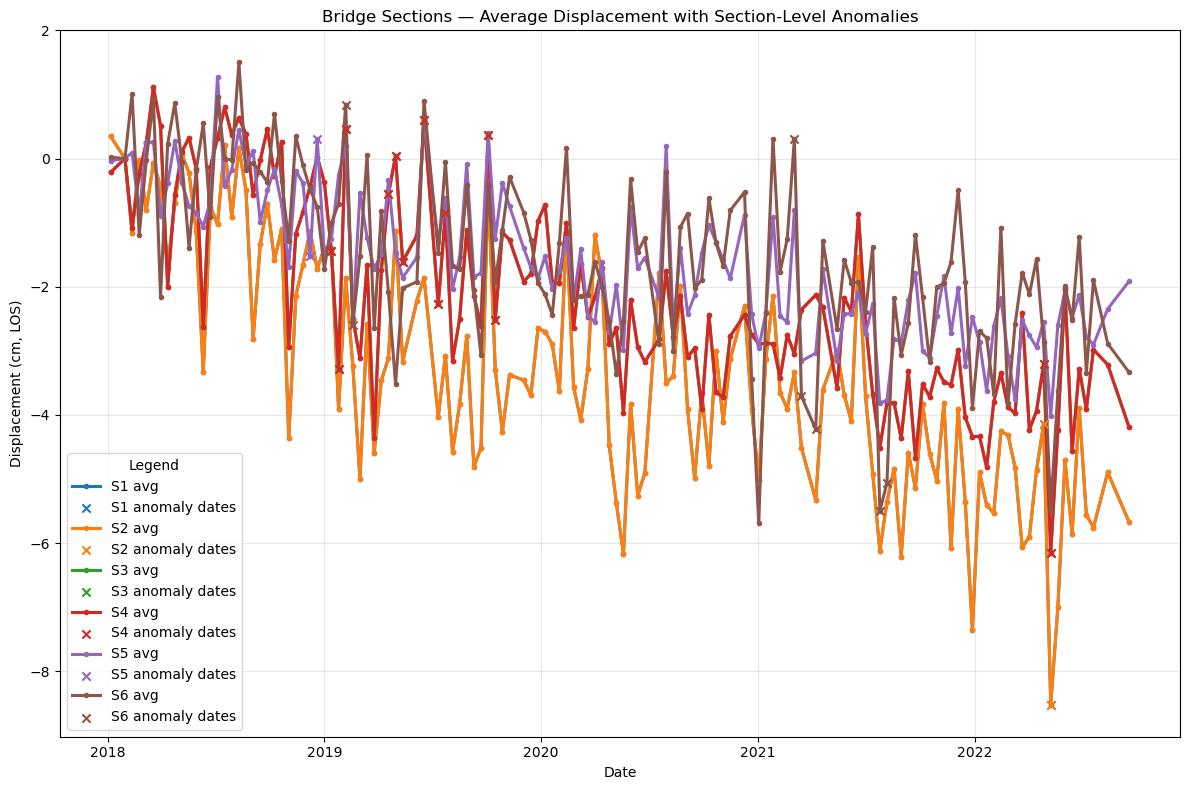

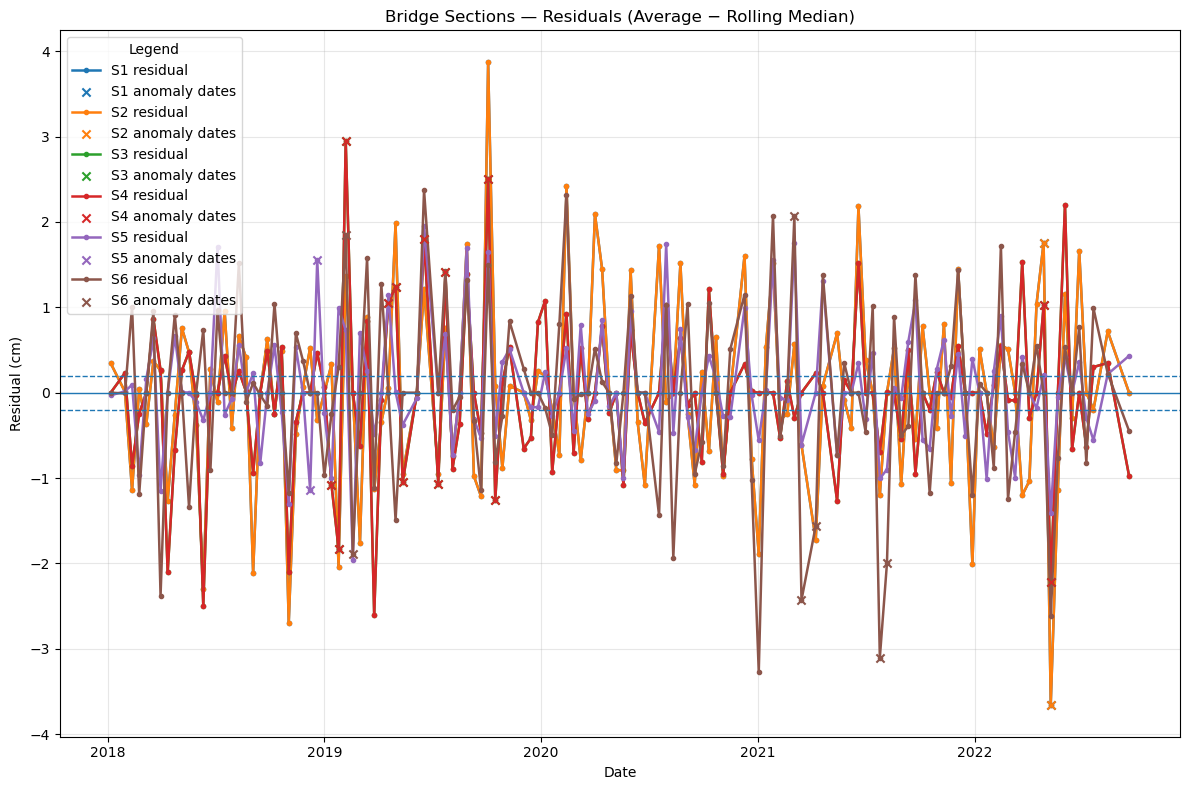

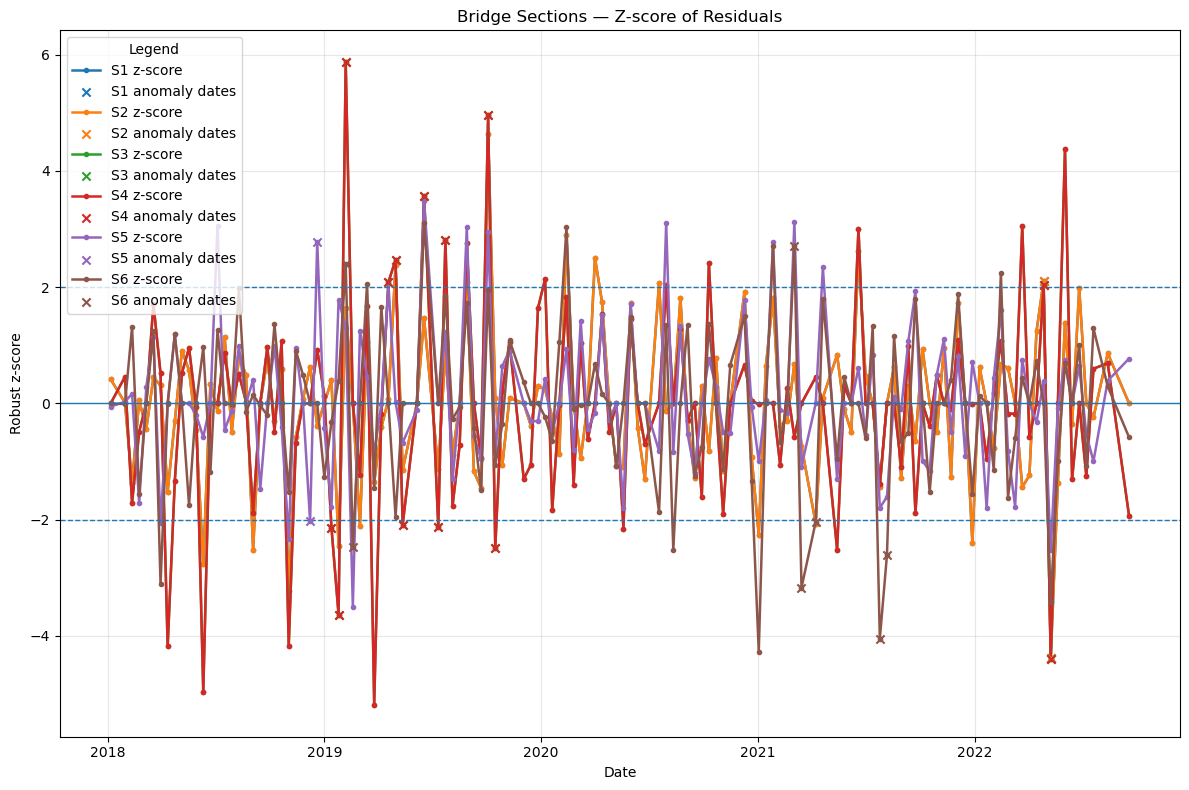

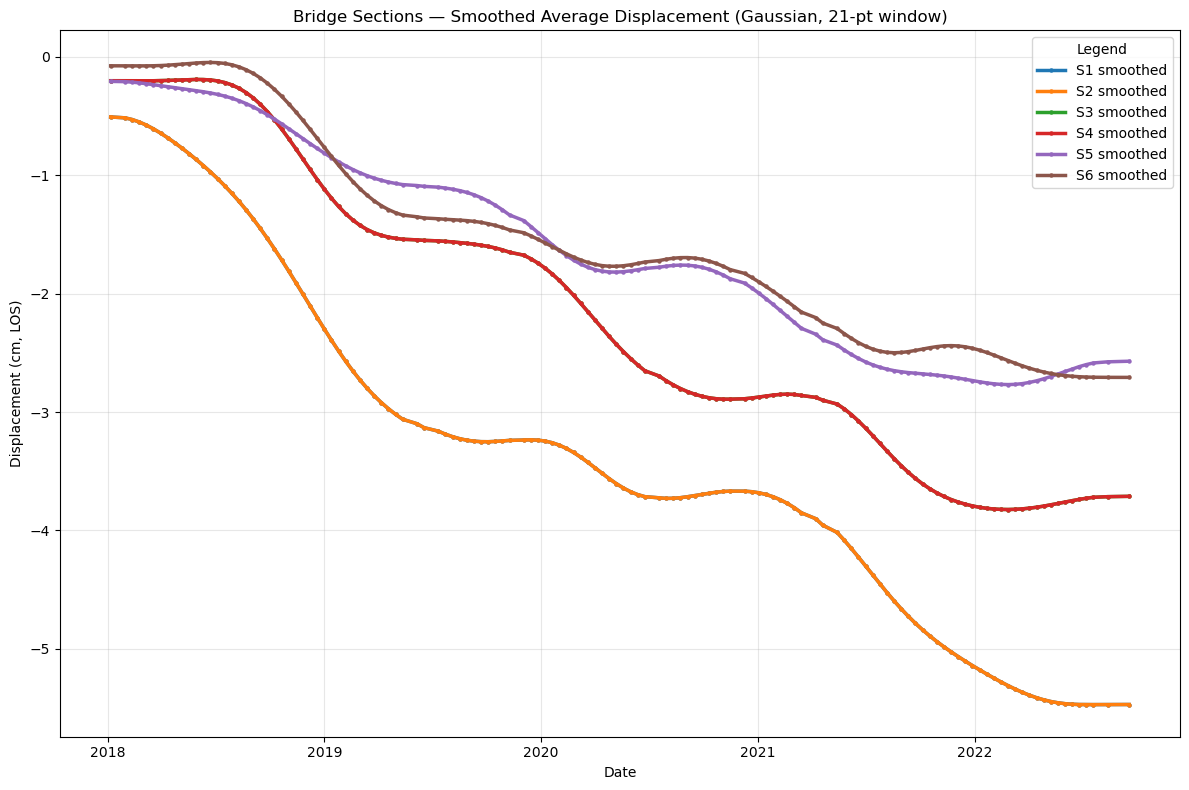

[S1] 2 anomalous dates (max run=2). First: 20220427, Last: 20220509. Max |residual|=3.87 cm, Max |z|=4.64.
[S2] 2 anomalous dates (max run=2). First: 20220427, Last: 20220509. Max |residual|=3.87 cm, Max |z|=4.64.
[S3] 13 anomalous dates (max run=3). First: 20190113, Last: 20220509. Max |residual|=2.95 cm, Max |z|=5.87.
[S4] 13 anomalous dates (max run=3). First: 20190113, Last: 20220509. Max |residual|=2.95 cm, Max |z|=5.87.
[S5] 2 anomalous dates (max run=2). First: 20181208, Last: 20181220. Max |residual|=1.96 cm, Max |z|=3.50.
[S6] 7 anomalous dates (max run=3). First: 20190206, Last: 20210806. Max |residual|=3.27 cm, Max |z|=4.27.
PDF report generated: geo_timeseries_ERA5_demErr_InSAR_Report.pdf


In [ ]:
import os
#os.chdir("/insar-data/Tocantins/mintpy")

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from mintpy.utils import readfile
import h5py
import csv
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

DATA_PATH = '/insar-data'
PROJECT_NAME = "Curaca2"
ASSET_NAME = "Ponte sobre o rio Autaz Mirim"
ANALYSIS_PERIOD = "20190101-20241218"
os.chdir('/insar-data/Curaca2/miaplpy/')
#os.chdir(f"{DATA_PATH}/{PROJECT_NAME}/mintpy")

# --- helpers ---
def parse_points(s):
    pts = []
    for item in s.split(";"):
        lon_str, lat_str = item.strip().split(",")
        pts.append((float(lat_str), float(lon_str)))
    return pts

def latlon_to_rc(meta, lat, lon):
    x0 = float(meta["X_FIRST"])
    y0 = float(meta["Y_FIRST"])
    dx = float(meta["X_STEP"])
    dy = float(meta["Y_STEP"])    # often negative
    width  = int(meta["WIDTH"])
    length = int(meta["LENGTH"])
    col = int(round((lon - x0) / dx))
    row = int(round((lat - y0) / dy))
    if not (0 <= row < length and 0 <= col < width):
        raise IndexError(f"Point ({lat:.6f},{lon:.6f}) -> (row={row}, col={col}) outside data [{length}x{width}]")
    return row, col

def _to_str_array(x):
    """Normalize various 'date list' representations to an array of 'YYYYMMDD' strings."""
    if isinstance(x, np.ndarray):
        if x.dtype.kind in ("S", "U", "O"):
            arr = [xi.decode() if isinstance(xi, (bytes, bytearray)) else str(xi) for xi in x.tolist()]
        else:  # e.g., int array like [20171005, ...]
            arr = [f"{int(xi):08d}" for xi in x.tolist()]
    elif isinstance(x, (bytes, bytearray, str)):
        s = x.decode() if isinstance(x, (bytes, bytearray)) else x
        arr = [t for t in s.replace(",", " ").split() if t]
    else:
        arr = [str(x)]
    return np.array(arr)

def get_dates(h5_file):
    """Robust date reader: try '/date' dataset; fall back to DATE_LIST or similar attrs (root or '/timeseries')."""
    try:
        dates_raw, _ = readfile.read(h5_file, datasetName="date")
        return np.array([d.decode() if isinstance(d, (bytes, bytearray)) else str(d) for d in dates_raw])
    except Exception:
        pass

    with h5py.File(h5_file, "r") as f:
        if "date" in f:
            return _to_str_array(f["date"][:])
        root_keys = ["DATE_LIST", "DATE", "DATES"]
        ts_keys   = ["DATE_LIST", "DATE", "DATES", "date"]
        for k in root_keys:
            if k in f.attrs:
                return _to_str_array(f.attrs[k])
        if "timeseries" in f:
            for k in ts_keys:
                if k in f["timeseries"].attrs:
                    return _to_str_array(f["timeseries"].attrs[k])
        try:
            _, meta = readfile.read(h5_file)
            for k in ["DATE_LIST", "DATE", "DATES"]:
                if k in meta:
                    return _to_str_array(meta[k])
        except Exception:
            pass

    raise RuntimeError("Could not find dates in the file (no '/date' dataset or date attributes like 'DATE_LIST').")

# ---------- inputs ----------
'''
sections = {
    "East_S1": {
        "points_str": "-47.46159935406088,-6.56050416644849;-47.46146373429202,-6.560468920830724;-47.46133077128363,-6.560438563882936;-47.46134626674425,-6.560370289325007;-47.46147585536021,-6.560402328449132;-47.46161531958357,-6.560432945876576;-47.46159935406088,-6.56050416644849 ",
        "labels": "P1;P2;P3;P4;P5;P6"
    },
    "East_S2": {
        "points_str": "-47.46130348920288,-6.560428485442362;-47.46116313409231,-6.560395837229959;-47.46099575417598,-6.56035720925049 ;-47.46101049572228,-6.560297594929002;-47.46117177651878,-6.560333628088344;-47.46131497525779,-6.560366494372492;-47.46130348920288,-6.560428485442362",
        "labels": "P1;P2;P3;P4;P5;P6"
    },
    "East_S3": {
        "points_str": "-47.46095796677579,-6.560348832338948;-47.46079646069482,-6.560309069960558;-47.46063750571581,-6.560273739331335;-47.46065103675672,-6.560214045251122;-47.46080687806177,-6.560249257433264;-47.46096836239918,-6.560286122425554;-47.46095796677579,-6.560348832338948",
        "labels": "P1;P2;P3;P4;P5;P6"
    },
    "Mid_S1": {
        "points_str": "-47.46060900757468,-6.560198250054605;-47.46059449768229,-6.560259839899425;-47.46043302983708,-6.560225335878401;-47.4602880936233,-6.560191829861957;-47.46029825726428,-6.560126693728696;-47.46045778823055,-6.560162137090549;-47.46060900757468,-6.560198250054605",
        "labels": "P1;P2;P3;P4;P5;P6"
    },
    "Mid_S2": {
        "points_str": "-47.46024701362929,-6.560183296170492;-47.46008648854441,-6.560148039799448;-47.45987171852053,-6.560095321136375;-47.45987808228551,-6.560033875740226;-47.4600987944757,-6.560085359451784;-47.46026005484211,-6.560121155016233;-47.46024701362929,-6.560183296170492",
        "labels": "P1;P2;P3;P4;P5;P6"
    },
    "Mid_S3": {
        "points_str": "-47.45984185771984,-6.560087645971586;-47.4596453876067,-6.560044880155928;-47.45944605995008,-6.559999092449311;-47.45946274437678,-6.559938014459747;-47.45965617287498,-6.55998361919587;-47.45985112158873,-6.560027804382649;-47.45984185771984,-6.560087645971586",
        "labels": "P1;P2;P3;P4;P5;P6"
    },
    "West_S1": {
        "points_str": "-47.45940799922867,-6.559919641117872;-47.45939199985407,-6.559981281395009;-47.45919391730619,-6.559942865288215;-47.45899807741331,-6.55989957229934;-47.45901043519845,-6.559835377698351;-47.45921368939044,-6.559877483777482;-47.45940799922867,-6.559919641117872",
        "labels": "P1;P2;P3;P4;P5;P6"
    },
    "West_S2": {
        "points_str": "-47.45896661527618,-6.559894742286868;-47.45881581930044,-6.559862098020168;-47.45861712759962,-6.559816215657076;-47.45863066775841,-6.559756601631374;-47.45882659329846,-6.559799414525194;-47.45898044201245,-6.559830642898655;-47.45896661527618,-6.559894742286868",
        "labels": "P1;P2;P3;P4;P5;P6"
    },
    "West_S3": {
        "points_str": "-47.45858651753384,-6.559806466086134;-47.45844677452839,-6.559778545068137;-47.45830264709105,-6.559746196402275;-47.45831742489085,-6.559683801501984;-47.45846016447318,-6.55971607723477;-47.45860150386818,-6.559748360350736;-47.45858651753384,-6.559806466086134",
        "labels": "P1;P2;P3;P4;P5;P6"
    },
    
}
'''
'''
sections = {
    "S1": {
        "points_str": "-59.86470859348496,-3.285370714344643;-59.86462055611591,-3.285255040610673;-59.8645396036644,-3.285148630622844;-59.86459728839178,-3.285107573898859;-59.86467946297454,-3.28521559036482;-59.86476063339817,-3.285330622261656;-59.86470859348496,-3.285370714344643",
        "labels": "P1;P2;P3;P4;P5;P6"
    },
    "S2": {
        "points_str": "-59.8644370268284,-3.285007037402755;-59.86434889668558,-3.284881709053743;-59.86440242445041,-3.284845004783714;-59.86449326041667,-3.284970691367773;-59.86457560649958,-3.285088378730951;-59.8645295337043,-3.285121847117055;-59.8644370268284,-3.285007037402755",
        "labels": "P1;P2;P3;P4;P5;P6"
    },
    "S3": {
        "points_str": "-59.86426266567021,-3.284752413042483;-59.86416089240879,-3.284621974126411;-59.86421244147285,-3.284579105801162;-59.86431493401744,-3.284723802326166;-59.86438719744192,-3.284824485970519;-59.86433533884031,-3.284859062421822;-59.86426266567021,-3.284752413042483",
        "labels": "P1;P2;P3;P4;P5;P6"
    },
    "S4": {
        "points_str": "-59.86407712889303,-3.284502426934595;-59.86399755222205,-3.284380778927595;-59.86404393348745,-3.28434523596046;-59.86412779011597,-3.28446496824139;-59.86419716433891,-3.28455849469122;-59.86414802097316,-3.284593533756977;-59.86407712889303,-3.284502426934595",
        "labels": "P1;P2;P3;P4;P5;P6"
    },
    "S5": {
        "points_str": "-59.86389894086604,-3.284258771111888;-59.86381914728519,-3.284139896872498;-59.86386419559135,-3.28410135354263;-59.86394992990944,-3.284218370587643;-59.86402630068294,-3.284321442322229;-59.86397400156685,-3.284358928664149;-59.86389894086604,-3.284258771111888",
        "labels": "P1;P2;P3;P4;P5;P6"
    },
    "S6": {
        "points_str": "-59.86370932701197,-3.283995773467324;-59.86361815863371,-3.283865886159408;-59.86366167419811,-3.28382565054865;-59.86376810011188,-3.283976066340049;-59.86383891977709,-3.284075084371434;-59.86378994172781,-3.284110292405286;-59.86370932701197,-3.283995773467324",
        "labels": "P1;P2;P3;P4;P5;P6"
    },
    "S7": {
        "points_str": "-59.8635206103835,-3.28372290486793;-59.86342976485827,-3.283603309992463;-59.86348351179431,-3.283567170381383;-59.86357369058511,-3.283686955753895;-59.86365132002414,-3.283795131135614;-59.86359657225834,-3.283832237251586;-59.8635206103835,-3.28372290486793",
        "labels": "P1;P2;P3;P4;P5;P6"
    },
    
}
#-59.86470859348496,-3.285370714344643;-59.86462055611591,-3.285255040610673;-59.8645396036644,-3.285148630622844;-59.86459728839178,-3.285107573898859;-59.86467946297454,-3.28521559036482;-59.86476063339817,-3.285330622261656;-59.86470859348496,-3.285370714344643
#-59.8644370268284,-3.285007037402755;-59.86434889668558,-3.284881709053743;-59.86440242445041,-3.284845004783714;-59.86449326041667,-3.284970691367773;-59.86457560649958,-3.285088378730951;-59.8645295337043,-3.285121847117055;-59.8644370268284,-3.285007037402755
#-59.86426266567021,-3.284752413042483;-59.86416089240879,-3.284621974126411;-59.86421244147285,-3.284579105801162;-59.86431493401744,-3.284723802326166;-59.86438719744192,-3.284824485970519;-59.86433533884031,-3.284859062421822;-59.86426266567021,-3.284752413042483
#-59.86407712889303,-3.284502426934595;-59.86399755222205,-3.284380778927595;-59.86404393348745,-3.28434523596046;-59.86412779011597,-3.28446496824139;-59.86419716433891,-3.28455849469122;-59.86414802097316,-3.284593533756977;-59.86407712889303,-3.284502426934595
#-59.86389894086604,-3.284258771111888;-59.86381914728519,-3.284139896872498;-59.86386419559135,-3.28410135354263;-59.86394992990944,-3.284218370587643;-59.86402630068294,-3.284321442322229;-59.86397400156685,-3.284358928664149;-59.86389894086604,-3.284258771111888
#-59.86370932701197,-3.283995773467324;-59.86361815863371,-3.283865886159408;-59.86366167419811,-3.28382565054865;-59.86376810011188,-3.283976066340049;-59.86383891977709,-3.284075084371434;-59.86378994172781,-3.284110292405286;-59.86370932701197,-3.283995773467324
#-59.8635206103835,-3.28372290486793;-59.86342976485827,-3.283603309992463;-59.86348351179431,-3.283567170381383;-59.86357369058511,-3.283686955753895;-59.86365132002414,-3.283795131135614;-59.86359657225834,-3.283832237251586;-59.8635206103835,-3.28372290486793
'''
'''
# Curaca
sections = {
    "S1": {
        "points_str": "-59.8549664628805,-3.275777327856561;-59.85501247436414,-3.275746957100562;-59.85505978696597,-3.275823500759548;-59.85511484178748,-3.275896992064087;-59.85506921814449,-3.275929286865768;-59.85501519853636,-3.275850805717089;-59.8549664628805,-3.275777327856561",
        "labels": "P1;P2;P3;P4;P5;P6"
    },
    "S2": {
        "points_str": "-59.8549664628805,-3.275777327856561;-59.85501247436414,-3.275746957100562;-59.85505978696597,-3.275823500759548;-59.85511484178748,-3.275896992064087;-59.85506921814449,-3.275929286865768;-59.85501519853636,-3.275850805717089;-59.8549664628805,-3.275777327856561",
        "labels": "P1;P2;P3;P4;P5;P6"
    },
    "S3": {
        "points_str": "-59.85480502858029,-3.275534438766204;-59.85475647828661,-3.275467138793803;-59.85479647993584,-3.275438149074823;-59.85484471328908,-3.275509587537198;-59.85488086194614,-3.275562221705814;-59.85484103998027,-3.275586893812435;-59.85480502858029,-3.275534438766204",
        "labels": "P1;P2;P3;P4;P5;P6"
    },
    "S4": {
        "points_str": "-59.85480502858029,-3.275534438766204;-59.85475647828661,-3.275467138793803;-59.85479647993584,-3.275438149074823;-59.85484471328908,-3.275509587537198;-59.85488086194614,-3.275562221705814;-59.85484103998027,-3.275586893812435;-59.85480502858029,-3.275534438766204",
        "labels": "P1;P2;P3;P4;P5;P6"
    },
    "S5": {
        "points_str": "-59.85462732492132,-3.275282638331558;-59.8545749146003,-3.275209077525829;-59.85451734383999,-3.275134770501561;-59.8545667196857,-3.275104764235299;-59.85461335641777,-3.275174705494952;-59.8546700584775,-3.275249850013136;-59.85462732492132,-3.275282638331558",
        "labels": "P1;P2;P3;P4;P5;P6"
    },
    "S6": {
        "points_str": "-59.85444498473381,-3.275029659140924;-59.85438251633735,-3.274948597340811;-59.8544296661379,-3.274913764251287;-59.85449245315775,-3.274999365510632;-59.85454318291915,-3.27507697927466;-59.85450330837417,-3.275108565466998;-59.85444498473381,-3.275029659140924",
        "labels": "P1;P2;P3;P4;P5;P6"
    },
    
    
}
'''
# -59.8549664628805,-3.275777327856561;-59.85501247436414,-3.275746957100562;-59.85505978696597,-3.275823500759548;-59.85511484178748,-3.275896992064087;-59.85506921814449,-3.275929286865768;-59.85501519853636,-3.275850805717089;-59.8549664628805,-3.275777327856561
# -59.85490183009287,-3.275682299652612;-59.8548515233818,-3.275611694234883;-59.85489536358005,-3.275584686077074;-59.85494700904241,-3.275654755227685;-59.85499582896875,-3.275728539321128;-59.85495140566944,-3.275756129266587;-59.85490183009287,-3.275682299652612
# -59.85480502858029,-3.275534438766204;-59.85475647828661,-3.275467138793803;-59.85479647993584,-3.275438149074823;-59.85484471328908,-3.275509587537198;-59.85488086194614,-3.275562221705814;-59.85484103998027,-3.275586893812435;-59.85480502858029,-3.275534438766204
# -59.85480502858029,-3.275534438766204;-59.85475647828661,-3.275467138793803;-59.85479647993584,-3.275438149074823;-59.85484471328908,-3.275509587537198;-59.85488086194614,-3.275562221705814;-59.85484103998027,-3.275586893812435;-59.85480502858029,-3.275534438766204
# -59.85462732492132,-3.275282638331558;-59.8545749146003,-3.275209077525829;-59.85451734383999,-3.275134770501561;-59.8545667196857,-3.275104764235299;-59.85461335641777,-3.275174705494952;-59.8546700584775,-3.275249850013136;-59.85462732492132,-3.275282638331558
# -59.85444498473381,-3.275029659140924;-59.85438251633735,-3.274948597340811;-59.8544296661379,-3.274913764251287;-59.85449245315775,-3.274999365510632;-59.85454318291915,-3.27507697927466;-59.85450330837417,-3.275108565466998;-59.85444498473381,-3.275029659140924

#JK
sections = {
    "S1": {
        "points_str": "-59.8549664628805,-3.275777327856561;-59.85501247436414,-3.275746957100562;-59.85505978696597,-3.275823500759548;-59.85511484178748,-3.275896992064087;-59.85506921814449,-3.275929286865768;-59.85501519853636,-3.275850805717089;-59.8549664628805,-3.275777327856561",
        "labels": "P1;P2;P3;P4;P5;P6"
    },
    "S2": {
        "points_str": "-59.8549664628805,-3.275777327856561;-59.85501247436414,-3.275746957100562;-59.85505978696597,-3.275823500759548;-59.85511484178748,-3.275896992064087;-59.85506921814449,-3.275929286865768;-59.85501519853636,-3.275850805717089;-59.8549664628805,-3.275777327856561",
        "labels": "P1;P2;P3;P4;P5;P6"
    },
    "S3": {
        "points_str": "-59.85480502858029,-3.275534438766204;-59.85475647828661,-3.275467138793803;-59.85479647993584,-3.275438149074823;-59.85484471328908,-3.275509587537198;-59.85488086194614,-3.275562221705814;-59.85484103998027,-3.275586893812435;-59.85480502858029,-3.275534438766204",
        "labels": "P1;P2;P3;P4;P5;P6"
    },
    "S4": {
        "points_str": "-59.85480502858029,-3.275534438766204;-59.85475647828661,-3.275467138793803;-59.85479647993584,-3.275438149074823;-59.85484471328908,-3.275509587537198;-59.85488086194614,-3.275562221705814;-59.85484103998027,-3.275586893812435;-59.85480502858029,-3.275534438766204",
        "labels": "P1;P2;P3;P4;P5;P6"
    },
    "S5": {
        "points_str": "-59.85462732492132,-3.275282638331558;-59.8545749146003,-3.275209077525829;-59.85451734383999,-3.275134770501561;-59.8545667196857,-3.275104764235299;-59.85461335641777,-3.275174705494952;-59.8546700584775,-3.275249850013136;-59.85462732492132,-3.275282638331558",
        "labels": "P1;P2;P3;P4;P5;P6"
    },
    "S6": {
        "points_str": "-59.85444498473381,-3.275029659140924;-59.85438251633735,-3.274948597340811;-59.8544296661379,-3.274913764251287;-59.85449245315775,-3.274999365510632;-59.85454318291915,-3.27507697927466;-59.85450330837417,-3.275108565466998;-59.85444498473381,-3.275029659140924",
        "labels": "P1;P2;P3;P4;P5;P6"
    },
    
    
}

-47.83325920129325,-15.81873316452596,0 -47.83310162113654,-15.81891545990351,0 -47.83296050522731,-15.81908778092585,0 -47.83275200947068,-15.81932810239634,0 -47.83268177522332,-15.81927661558415,0 -47.8325877998821,-15.81919673795594,0 -47.83279625013162,-15.81894843551723,0 -47.83294763827799,-15.81876942641095,0 -47.83310360671356,-15.81859626423708,0 -47.83325417687176,-15.81842274487094,0 -47.83334344852211,-15.81850665406241,0 -47.83342486997562,-15.81856709467188,0 -47.83325920129325,-15.81873316452596,0


h5_file = f'{DATA_PATH}/{PROJECT_NAME}/miaplpy/network_delaunay_4/geo/geo_timeseries_ERA5_demErr.h5'


# ---------- section-level anomaly config ----------
SEC_ROLL_MED_WIN = 5   # window (in acquisitions) for rolling median baseline (odd numbers: 5, 7, 9...)
SEC_CM_THRESH    = 0.2 # cm threshold on residual from baseline
SEC_Z_THRESH     = 2.0 # robust z-score threshold on residual
SEC_MIN_CONSEC   = 2   # require at least this many consecutive anomalous dates

# ---------- small utilities ----------
def _max_run_length(bool_arr):
    """Max consecutive True run length in a 1D boolean array."""
    m = 0
    cur = 0
    for b in bool_arr:
        cur = cur + 1 if b else 0
        if cur > m:
            m = cur
    return m

def _enforce_min_consecutive(mask, k):
    """Keep only runs of True with length >= k."""
    if k <= 1:
        return mask.copy()
    out = np.zeros_like(mask, dtype=bool)
    n = mask.size
    i = 0
    while i < n:
        if mask[i]:
            j = i
            while j < n and mask[j]:
                j += 1
            if (j - i) >= k:
                out[i:j] = True
            i = j
        else:
            i += 1
    return out

def generate_pdf_report(pdf_filename, project_name, asset_name, analysis_period, 
                       fig_files, anomaly_data, section_summary_rows):
    """Generate a comprehensive PDF report with title page, plots, and anomaly table."""
    
    with PdfPages(pdf_filename) as pdf:
        # Title Page
        fig_title = plt.figure(figsize=(8.5, 11))
        plt.axis('off')
        
        # Main title
        plt.text(0.5, 0.8, f'InSAR Analysis Report', 
                ha='center', va='center', fontsize=24, fontweight='bold')
        
        # Project and asset info
        plt.text(0.5, 0.7, f'Project: {project_name}', 
                ha='center', va='center', fontsize=18)
        plt.text(0.5, 0.65, f'Asset: {asset_name}', 
                ha='center', va='center', fontsize=18)
        
        # Analysis period
        plt.text(0.5, 0.55, f'Analysis Period', 
                ha='center', va='center', fontsize=16, fontweight='bold')
        plt.text(0.5, 0.5, f'{analysis_period}', 
                ha='center', va='center', fontsize=14)
        
        # Report generation date
        plt.text(0.5, 0.3, f'Report Generated: {datetime.now().strftime("%Y-%m-%d %H:%M")}', 
                ha='center', va='center', fontsize=12)
        
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        pdf.savefig(fig_title, bbox_inches='tight')
        plt.close(fig_title)
        
        # Add the three plots
        for fig_file in fig_files:
            if os.path.exists(fig_file):
                # Read and display the saved figure
                fig = plt.figure(figsize=(11, 8.5))
                img = plt.imread(fig_file)
                plt.imshow(img)
                plt.axis('off')
                plt.tight_layout()
                pdf.savefig(fig, bbox_inches='tight')
                plt.close(fig)
        
        # Anomaly Summary Table
        if section_summary_rows:
            fig_table = plt.figure(figsize=(11, 8.5))
            plt.axis('off')
            
            # Table title
            plt.text(0.5, 0.95, 'Flagged Anomalies Summary', 
                    ha='center', va='top', fontsize=16, fontweight='bold')
            
            # Prepare table data
            headers = ['Section', 'Flagged Dates', 'Max Consecutive', 
                      'First Anomaly', 'Last Anomaly', 'Max |Residual| (cm)', 'Max |Z-score|']
            
            table_data = []
            for row in section_summary_rows:
                sec_name, n_flag, max_run, first_date, last_date, max_abs_resid, max_abs_z = row[:7]
                table_data.append([
                    sec_name, 
                    str(n_flag), 
                    str(max_run),
                    first_date if first_date else 'N/A',
                    last_date if last_date else 'N/A',
                    f'{max_abs_resid:.2f}',
                    f'{max_abs_z:.2f}'
                ])
            
            # Create table
            table = plt.table(cellText=table_data,
                             colLabels=headers,
                             cellLoc='center',
                             loc='center',
                             bbox=[0.05, 0.1, 0.9, 0.8])
            
            table.auto_set_font_size(False)
            table.set_fontsize(9)
            table.scale(1, 2)
            
            # Style the table
            for i in range(len(headers)):
                table[(0, i)].set_facecolor('#40466e')
                table[(0, i)].set_text_props(weight='bold', color='white')
            
            # Color rows with anomalies
            for i, row in enumerate(table_data):
                if int(row[1]) > 0:  # If there are flagged dates
                    for j in range(len(headers)):
                        table[(i+1, j)].set_facecolor('#ffcccc')
            
            pdf.savefig(fig_table, bbox_inches='tight')
            plt.close(fig_table)
    
    print(f"PDF report generated: {pdf_filename}")

def _rolling_median(x, win):
    """Rolling median with edge handling (centered window; uses nanmedian)."""
    x = np.asarray(x, dtype=float)
    n = x.size
    half = win // 2
    rm = np.full(n, np.nan)
    for i in range(n):
        i0 = max(0, i - half)
        i1 = min(n, i + half + 1)
        rm[i] = np.nanmedian(x[i0:i1])
    return rm

# ---------- read data ----------
ts, meta = readfile.read(h5_file)  # 3-D (n_date, length, width), meters
print("timeseries shape:", ts.shape)

dates = get_dates(h5_file)
dates_dt = np.array([datetime.strptime(d, "%Y%m%d") for d in dates])

# ---------- compute per-section averages + section-level anomalies ----------
section_avg = {}             # name -> (n_dates,) cm
section_anom_mask = {}       # name -> (n_dates,) bool
section_resid = {}           # name -> residual cm (avg - rolling median)
section_flagged_idx = {}     # name -> indices of anomalous dates
section_z = {}               # name -> robust z-score array (n_dates,)
section_summary_rows = []    # rows for per-section summary

for sec_name, cfg in sections.items():
    pts = parse_points(cfg["points_str"])

    # collect each point's time-series (cm)
    series_cm = []
    for (lat, lon) in pts:
        r, c = latlon_to_rc(meta, lat, lon)
        disp_m = ts[:, r, c]
        series_cm.append(disp_m * 100.0)  # m -> cm

    arr = np.vstack(series_cm)                # (n_pts, n_dates)
    avg_cm = np.nanmean(arr, axis=0)         # (n_dates,)
    section_avg[sec_name] = avg_cm

    # residual vs. rolling-median baseline
    base = _rolling_median(avg_cm, SEC_ROLL_MED_WIN)
    resid = avg_cm - base
    section_resid[sec_name] = resid

    # robust z-score of residual
    med_r = np.nanmedian(resid)
    mad_r = np.nanmedian(np.abs(resid - med_r))
    robust_std = 1.4826 * mad_r + 1e-9
    z = (resid - med_r) / robust_std
    section_z[sec_name] = z

    # anomaly mask and persistence constraint
    raw_mask = (np.abs(resid) > SEC_CM_THRESH) & (np.abs(z) > SEC_Z_THRESH)
    mask = _enforce_min_consecutive(raw_mask, SEC_MIN_CONSEC)
    section_anom_mask[sec_name] = mask
    section_flagged_idx[sec_name] = np.where(mask)[0]

    # summary
    n_flag = int(np.nansum(mask))
    max_run = _max_run_length(mask)
    first_date = dates[np.where(mask)[0][0]] if n_flag > 0 else ""
    last_date  = dates[np.where(mask)[0][-1]] if n_flag > 0 else ""
    max_abs_resid = float(np.nanmax(np.abs(resid))) if np.isfinite(resid).any() else 0.0
    max_abs_z     = float(np.nanmax(np.abs(z))) if np.isfinite(z).any() else 0.0

    section_summary_rows.append([
        sec_name, n_flag, max_run, first_date, last_date, max_abs_resid, max_abs_z,
        SEC_ROLL_MED_WIN, SEC_CM_THRESH, SEC_Z_THRESH, SEC_MIN_CONSEC
    ])

# ---------- plotting ----------
outbase = os.path.splitext(os.path.basename(h5_file))[0]
fig_name = f"{outbase}_ts_sectionAvgs.png"
csv_name = f"{outbase}_ts_sectionAvgs.csv"
sec_anom_date_csv = f"{outbase}_section_anom_dates.csv"
sec_anom_summary_csv = f"{outbase}_section_anom_summary.csv"
resid_fig_name = f"{outbase}_ts_sectionResiduals.png"
z_fig_name = f"{outbase}_ts_sectionZscores.png"

# 1) section averages with anomaly markers
fig1 = plt.figure(figsize=(12, 8))
for sec_name, avg_series_cm in section_avg.items():
    plt.plot(dates_dt, avg_series_cm, linewidth=2.2, marker="o", markersize=3, label=f"{sec_name} avg")
    idx = section_flagged_idx[sec_name]
    if idx.size > 0:
        plt.scatter(dates_dt[idx], avg_series_cm[idx], s=35, marker="x", zorder=4, label=f"{sec_name} anomaly dates")
plt.xlabel("Date")
plt.ylabel("Displacement (cm, LOS)")
plt.title("Bridge Sections — Average Displacement with Section-Level Anomalies")
plt.grid(True, alpha=0.3)
plt.legend(title="Legend")
plt.tight_layout()
plt.savefig(fig_name, dpi=300, bbox_inches='tight')
plt.show()





# 2) residual plot
fig2 = plt.figure(figsize=(12, 8))
for sec_name, resid in section_resid.items():
    plt.plot(dates_dt, resid, linewidth=1.8, marker="o", markersize=3, label=f"{sec_name} residual")
    idx = section_flagged_idx[sec_name]
    if idx.size > 0:
        plt.scatter(dates_dt[idx], resid[idx], s=35, marker="x", zorder=4, label=f"{sec_name} anomaly dates")
plt.axhline(0.0, linewidth=1.0)
plt.axhline(+SEC_CM_THRESH, linewidth=1.0, linestyle="--")
plt.axhline(-SEC_CM_THRESH, linewidth=1.0, linestyle="--")
plt.xlabel("Date")
plt.ylabel("Residual (cm)")
plt.title("Bridge Sections — Residuals (Average − Rolling Median)")
plt.grid(True, alpha=0.3)
plt.legend(title="Legend")
plt.tight_layout()
plt.savefig(resid_fig_name, dpi=300, bbox_inches='tight')
plt.show()

# 3) z-score plot
fig3 = plt.figure(figsize=(12, 8))
for sec_name, z in section_z.items():
    plt.plot(dates_dt, z, linewidth=1.8, marker="o", markersize=3, label=f"{sec_name} z-score")
    idx = section_flagged_idx[sec_name]
    if idx.size > 0:
        plt.scatter(dates_dt[idx], z[idx], s=35, marker="x", zorder=4, label=f"{sec_name} anomaly dates")
plt.axhline(0.0, linewidth=1.0)
plt.axhline(+SEC_Z_THRESH, linewidth=1.0, linestyle="--")
plt.axhline(-SEC_Z_THRESH, linewidth=1.0, linestyle="--")
plt.xlabel("Date")
plt.ylabel("Robust z-score")
plt.title("Bridge Sections — Z-score of Residuals")
plt.grid(True, alpha=0.3)
plt.legend(title="Legend")
plt.tight_layout()
plt.savefig(z_fig_name, dpi=300, bbox_inches='tight')
plt.show()

# ---------- smoothing filter configuration ----------
SMOOTH_FILTER_WIN = 21  # window size for smoothing filter (odd number)

def apply_smoothing_filter(series, window=5, method='gaussian'):
    """
    Apply smoothing filter to make time series smoother.
    
    Parameters:
    - series: input time series (1D array)
    - window: window size for smoothing
    - method: smoothing method ('moving_avg', 'gaussian', 'savgol')
    
    Returns:
    - smoothed_series: smoothed time series
    """
    from scipy import ndimage
    from scipy.signal import savgol_filter
    
    series = np.array(series, dtype=float)
    
    if method == 'moving_avg':
        # Simple moving average
        return _rolling_median(series, window)  # Reuse existing rolling function but with mean
    
    elif method == 'gaussian':
        # Gaussian smoothing - good for preserving overall trends while reducing noise
        sigma = window / 3.0  # Standard deviation for Gaussian kernel
        # Handle NaN values
        mask = ~np.isnan(series)
        if np.any(mask):
            smoothed = series.copy()
            smoothed[mask] = ndimage.gaussian_filter1d(series[mask], sigma=sigma)
            return smoothed
        else:
            return series
    
    elif method == 'savgol':
        # Savitzky-Golay filter - good for preserving peaks while smoothing
        if len(series) > window and window >= 3:
            # Handle NaN values by interpolating first
            mask = ~np.isnan(series)
            if np.sum(mask) > window:
                from scipy.interpolate import interp1d
                valid_indices = np.where(mask)[0]
                if len(valid_indices) > 2:
                    f = interp1d(valid_indices, series[valid_indices], 
                               kind='linear', fill_value='extrapolate')
                    series_interp = f(np.arange(len(series)))
                    return savgol_filter(series_interp, window, polyorder=2)
        return series
    
    return series

def _rolling_mean(x, win):
    """Rolling mean with edge handling."""
    x = np.asarray(x, dtype=float)
    n = x.size
    half = win // 2
    rm = np.full(n, np.nan)
    for i in range(n):
        i0 = max(0, i - half)
        i1 = min(n, i + half + 1)
        rm[i] = np.nanmean(x[i0:i1])
    return rm

# 4) smoothed averages plot
section_smoothed = {}  # name -> (n_dates,) cm, smoothed

fig4 = plt.figure(figsize=(12, 8))
for sec_name, avg_series_cm in section_avg.items():
    # Apply smoothing filter
    smoothed_series = apply_smoothing_filter(
        avg_series_cm, 
        window=SMOOTH_FILTER_WIN, 
        method='gaussian'
    )
    section_smoothed[sec_name] = smoothed_series
    
    # Plot original series (lighter, thinner)
    #plt.plot(dates_dt, avg_series_cm, linewidth=1.2, alpha=0.5, linestyle='--',
    #         label=f"{sec_name} original")
    
    # Plot smoothed series (main line, thicker and smoother)
    #plt.plot(dates_dt, smoothed_series, linewidth=2.5, marker="o", markersize=4, 
    #         label=f"{sec_name} smoothed")
    plt.plot(dates_dt, smoothed_series, linewidth=2.5, marker="o", markersize=2.2, 
             label=f"{sec_name} smoothed")


    
plt.xlabel("Date")
plt.ylabel("Displacement (cm, LOS)")
plt.title(f"Bridge Sections — Smoothed Average Displacement (Gaussian, {SMOOTH_FILTER_WIN}-pt window)")
plt.grid(True, alpha=0.3)
plt.legend(title="Legend")
plt.tight_layout()

# Save the smoothed figure
smoothed_fig_name = f"{outbase}_ts_sectionAvgs_smoothed.png"
plt.savefig(smoothed_fig_name, dpi=300, bbox_inches='tight')
plt.show()

# ---------- CSV exports ----------
# per-date section averages
# with open(csv_name, "w", newline="") as f:
#     w = csv.writer(f)
#     w.writerow(["date"] + list(section_avg.keys()))
#     for i, d in enumerate(dates):
#         w.writerow([d] + [float(section_avg[name][i]) for name in section_avg.keys()])

# # per-date section-level anomaly flags (1/0)
# with open(sec_anom_date_csv, "w", newline="") as f:
#     w = csv.writer(f)
#     header = ["date"] + [f"{name}_flag" for name in section_avg.keys()]
#     w.writerow(header)
#     for i, d in enumerate(dates):
#         w.writerow([d] + [int(section_anom_mask[name][i]) for name in section_avg.keys()])

# # per-section summary
# with open(sec_anom_summary_csv, "w", newline="") as f:
#     w = csv.writer(f)
#     w.writerow([
#         "section", "n_flagged_dates", "max_consecutive_flagged",
#         "first_flagged_date", "last_flagged_date",
#         "max_abs_residual_cm", "max_abs_robust_z",
#         "cfg_roll_win", "cfg_cm_thresh", "cfg_z_thresh", "cfg_min_consec"
#     ])
#     w.writerows(section_summary_rows)

# console summary
for row in section_summary_rows:
    sec_name, n_flag, max_run, first_date, last_date, max_abs_resid, max_abs_z, *_ = row
    if n_flag == 0:
        print(f"[{sec_name}] No section-level anomalies.")
    else:
        print(f"[{sec_name}] {n_flag} anomalous dates (max run={max_run}). "
              f"First: {first_date}, Last: {last_date}. "
              f"Max |residual|={max_abs_resid:.2f} cm, Max |z|={max_abs_z:.2f}.")

# ---------- Generate PDF Report ----------
pdf_filename = f"{outbase}_InSAR_Report.pdf"
figure_files = [fig_name,smoothed_fig_name, resid_fig_name, z_fig_name]

generate_pdf_report(
    pdf_filename=pdf_filename,
    project_name=PROJECT_NAME,
    asset_name=ASSET_NAME,
    analysis_period=ANALYSIS_PERIOD,
    fig_files=figure_files,
    anomaly_data=section_anom_mask,
    section_summary_rows=section_summary_rows
)


In [1]:
# Use MintPy's CLI from Python: mintpy.cli.plot_transection.main
# This cell saves the transect figure (and can run headless).

from mintpy.cli.plot_transection import main as plot_transection_main
import os, sys, shutil

def run_plot_transection(
    h5file,
    lat1, lon1,
    lat2, lon2,
    dset="velocity",
    interpolation="bilinear",
    outfile="velocity_transect.png",
    save=True,
    nodisplay=True,
):
    # Build CLI-style args (exactly what you'd pass on the command line)
    iargs = [
        h5file,
        "--dset", dset,
        "--start-lalo", f"{lat1}", f"{lon1}",
        "--end-lalo",   f"{lat2}", f"{lon2}",
        "--interpolation", interpolation,
    ]
    if save:
        iargs += ["--save"]
    if nodisplay:
        iargs += ["--nodisplay"]
    if outfile:
        os.makedirs(os.path.dirname(outfile) or ".", exist_ok=True)
        iargs += ["-o", outfile]

    # Prefer new signature main(iargs); fall back to argv-based main()
    try:
        # Newer MintPy: main(iargs=list) supported
        return plot_transection_main(iargs)
    except TypeError:
        # Older MintPy: main() reads sys.argv
        old_argv = sys.argv[:]
        try:
            sys.argv = ["plot_transection"] + iargs
            return plot_transection_main()
        finally:
            sys.argv = old_argv

# ---------------- Example usage ----------------
# (edit these four numbers to your endpoints)
#lat1, lon1 = -3.28529017540711, -59.86498049331365
#lat2, lon2 = -3.283445567182719, -59.8635486160823

# Curaca
lat1, lon1 = -3.276522910174481, -59.85548776356948
lat2, lon2 = -3.274225103078294, -59.85389804800792

# Path to your geocoded velocity file
h5file = "/insar-data/Curaca2/miaplpy/network_delaunay_4/geo/geo_velocity.h5"

# Output figure path
outfile = "velocity_transect.png"
os.chdir("/insar-data/Curaca2/miaplpy/")
# Run it
run_plot_transection(
    h5file=h5file,
    lat1=lat1, lon1=lon1,
    lat2=lat2, lon2=lon2,
    dset="velocity",
    interpolation="bilinear",
    outfile=outfile,
    save=True,
    nodisplay=True,
)

print(f"Saved: {os.path.abspath(outfile)}")


plot_transection.py /insar-data/Curaca2/miaplpy/network_delaunay_4/geo/geo_velocity.h5 --dset velocity --start-lalo -3.276522910174481 -59.85548776356948 --end-lalo -3.274225103078294 -59.85389804800792 --interpolation bilinear --save --nodisplay -o velocity_transect.png
run view.py in MintPy version 1.6.2, date 2025-07-07
input file is velocity file: /insar-data/Curaca2/miaplpy/network_delaunay_4/geo/geo_velocity.h5 in float32 format
file size in y/x: (54, 29)
input dataset: "['velocity']"
turning glob search OFF for velocity file
num of datasets in file geo_velocity.h5: 5
datasets to exclude (0):
[]
datasets to display (1):
['velocity']
data   coverage in y/x: (0, 0, 29, 54)
subset coverage in y/x: (0, 0, 29, 54)
data   coverage in lat/lon: (-59.85591143621289, -3.2733990676398927, -59.85346714221289, -3.277189273639893)
subset coverage in lat/lon: (-59.85591143621289, -3.2733990676398927, -59.85346714221289, -3.277189273639893)
-------------------------------------------------------

In [7]:
valor_mes = 4000
rendimento_ano = 0.12
redimento = rendimento_ano/12
periodo_meses = 12*5
vf = valor_mes * (((1 + redimento) ** periodo_meses)-1)/redimento
vf

326678.67942563654